## MTA Transit Data Exploration for NYCider Merchant

Data Exploration MVP Defining Questions: Which station has the highest traffic by season for 2019-2021?

In [231]:
#The steps prior to the import of the pickled df below include importing 3 years of MTA data using SQLite and SQLAlchemy. 
#Working with the 3-year dataset is time expensive and thus a smaller version was pickled and imported here.
#Future versions of this notebook will include that specific code. 

In [6]:
df_2_daily = pd.read_pickle("./df.pkl")
df_2_daily.sample()

,C/A,UNIT,SCP,STATION,DATE,EXITS,EN-EX,ENTRIES,PREV_DATE,PREV_ENTRIES,PREV_EXITS,PREV_EN-EX,DAILY_ENTRIES,DAILY_EXITS
28193131,R629,R065,00-00-00,ROCKAWAY AV,2020-11-15,199414,179136,378550,11/15/2020,378517.0,199382.0,179135.0,33.0,32.0


In [2]:
import pandas as pd

In [8]:
df_2_daily.shape

(28984234, 14)

In [9]:
ca_unit_station_daily = df_2_daily.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES','DAILY_EXITS']].sum().reset_index()
ca_unit_station_daily.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS
0,A002,R051,59 ST,2018-12-29,39332.0,60794.0
1,A002,R051,59 ST,2018-12-30,38259.0,59802.0
2,A002,R051,59 ST,2018-12-31,41103.0,61084.0
3,A002,R051,59 ST,2019-01-01,4842.0,2851.0
4,A002,R051,59 ST,2019-01-02,12653.0,35308.0


In [10]:
station_daily = ca_unit_station_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES',"DAILY_EXITS"]].sum().reset_index()
station_daily.head()

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS
0,1 AV,2018-12-29,33628.0,15430.0
1,1 AV,2018-12-30,32154.0,13106.0
2,1 AV,2018-12-31,35372.0,17372.0
3,1 AV,2019-01-01,8376.0,9976.0
4,1 AV,2019-01-02,18185.0,43342.0


In [11]:
station_daily["TRAFFIC"] = station_daily["DAILY_ENTRIES"] + station_daily["DAILY_EXITS"]
station_daily.head()

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,TRAFFIC
0,1 AV,2018-12-29,33628.0,15430.0,49058.0
1,1 AV,2018-12-30,32154.0,13106.0,45260.0
2,1 AV,2018-12-31,35372.0,17372.0,52744.0
3,1 AV,2019-01-01,8376.0,9976.0,18352.0
4,1 AV,2019-01-02,18185.0,43342.0,61527.0


In [15]:
#station_daily.to_csv (r'/Users/vesper/Documents/Metis/MTA_project/station_daily.csv', index = False, header=True)

In [19]:
#station_totals = station_daily.groupby('STATION','DATE').sum()\
#    .sort_values('TRAFFIC', ascending=False)\
#    .reset_index()

#station_totals.head()

In [22]:
station_daily_2 = station_daily[["STATION","DATE","TRAFFIC"]]
station_daily_2

,STATION,DATE,TRAFFIC
0,1 AV,2018-12-29,49058.0
1,1 AV,2018-12-30,45260.0
2,1 AV,2018-12-31,52744.0
3,1 AV,2019-01-01,18352.0
4,1 AV,2019-01-02,61527.0
...,...,...,...
415311,ZEREGA AV,2021-12-27,2086.0
415312,ZEREGA AV,2021-12-28,2141.0
415313,ZEREGA AV,2021-12-29,2098.0
415314,ZEREGA AV,2021-12-30,2076.0


In [27]:
station_daily_2 = station_daily_2[(station_daily_2["DATE"] >= "2019-1-1")]

,STATION,DATE,TRAFFIC
3,1 AV,2019-01-01,18352.0
4,1 AV,2019-01-02,61527.0
5,1 AV,2019-01-03,64748.0
6,1 AV,2019-01-04,66649.0
7,1 AV,2019-01-05,52741.0
...,...,...,...
415311,ZEREGA AV,2021-12-27,2086.0
415312,ZEREGA AV,2021-12-28,2141.0
415313,ZEREGA AV,2021-12-29,2098.0
415314,ZEREGA AV,2021-12-30,2076.0


In [28]:
weather = pd.read_csv(r'/Users/vesper/Documents/Metis/MTA_project/weather_data.csv')
weather.head()

,STATION,NAME,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08
0,USW00094728,"NY CITY CENTRAL PARK, NY US",2019-01-01,NaN,NaN,0.06,0.0,0.0,NaN,58,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00094728,"NY CITY CENTRAL PARK, NY US",2019-01-02,NaN,NaN,0.00,0.0,0.0,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00094728,"NY CITY CENTRAL PARK, NY US",2019-01-03,NaN,NaN,0.00,0.0,0.0,NaN,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00094728,"NY CITY CENTRAL PARK, NY US",2019-01-04,NaN,NaN,0.00,0.0,0.0,NaN,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00094728,"NY CITY CENTRAL PARK, NY US",2019-01-05,NaN,NaN,0.50,0.0,0.0,NaN,47,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
weather = weather[["DATE", "AWND", "PRCP", "SNOW", "SNWD", "TMAX", "TMIN","WSF5"]]

In [36]:
weather["DATE"] = pd.to_datetime(weather["DATE"])

In [37]:
weather["MONTH"] = weather.DATE.dt.month
weather["YEAR"] = weather.DATE.dt.year
season_map = {range(1, 4): "W", range(4, 7): "SP", range(7, 10): "SU", range(10,13): "F"}
weather["SEASON"] = weather.MONTH.apply(lambda x: next((v for k, v in season_map.items() if x in k), 0))

In [38]:
weather['YEAR']= weather['YEAR'].apply(str)
weather["SY"] = weather.SEASON + weather.YEAR

In [39]:
weather.sample(15)

,DATE,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,WSF5,MONTH,YEAR,SEASON,SY
1068,2021-12-04,3.36,0.00,0.0,0.0,48,36,18.1,12,2021,F,F2021
87,2019-03-29,2.01,0.00,0.0,0.0,59,49,16.1,3,2019,W,W2019
732,2021-01-02,6.71,0.05,0.0,0.0,51,36,33.1,1,2021,W,W2021
227,2019-08-16,2.68,0.00,0.0,0.0,79,68,21.9,8,2019,SU,SU2019
157,2019-06-07,2.24,0.00,0.0,0.0,81,66,13.0,6,2019,SP,SP2019
966,2021-08-24,2.91,0.00,0.0,0.0,89,72,15.0,8,2021,SU,SU2021
568,2020-07-22,2.91,1.42,0.0,0.0,92,72,35.1,7,2020,SU,SU2020
525,2020-06-09,NaN,0.00,0.0,0.0,87,65,NaN,6,2020,SP,SP2020
699,2020-11-30,6.26,0.98,0.0,0.0,63,50,35.1,11,2020,F,F2020
161,2019-06-11,6.26,0.45,0.0,0.0,77,63,25.9,6,2019,SP,SP2019


In [40]:
weather["T_AVG"]=(weather.TMAX + weather.TMIN)/2

In [41]:
station_weather_merge = pd.merge(station_daily_2,weather, left_on = "DATE", right_on = "DATE")

In [42]:
station_weather_merge

,STATION,DATE,TRAFFIC,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,WSF5,MONTH,YEAR,SEASON,SY,T_AVG
0,1 AV,2019-01-01,18352.0,NaN,0.06,0.0,0.0,58,39,NaN,1,2019,W,W2019,48.5
1,103 ST,2019-01-01,21462.0,NaN,0.06,0.0,0.0,58,39,NaN,1,2019,W,W2019,48.5
2,103 ST-CORONA,2019-01-01,14148.0,NaN,0.06,0.0,0.0,58,39,NaN,1,2019,W,W2019,48.5
3,104 ST,2019-01-01,1695.0,NaN,0.06,0.0,0.0,58,39,NaN,1,2019,W,W2019,48.5
4,110 ST,2019-01-01,8011.0,NaN,0.06,0.0,0.0,58,39,NaN,1,2019,W,W2019,48.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414180,WOODLAWN,2021-12-31,2413.0,2.46,0.00,0.0,0.0,55,48,15.0,12,2021,F,F2021,51.5
414181,WORLD TRADE CTR,2021-12-31,214196.0,2.46,0.00,0.0,0.0,55,48,15.0,12,2021,F,F2021,51.5
414182,WTC-CORTLANDT,2021-12-31,416658.0,2.46,0.00,0.0,0.0,55,48,15.0,12,2021,F,F2021,51.5
414183,YORK ST,2021-12-31,39423.0,2.46,0.00,0.0,0.0,55,48,15.0,12,2021,F,F2021,51.5


In [44]:
station_weather_merge.sort_values("AWND", ascending = False)

,STATION,DATE,TRAFFIC,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,WSF5,MONTH,YEAR,SEASON,SY,T_AVG
288042,CONEY IS-STILLW,2021-02-01,142611.0,14.32,1.85,14.8,5.1,34,22,36.0,2,2021,W,W2021,28.0
288040,CLEVELAND ST,2021-02-01,783.0,14.32,1.85,14.8,5.1,34,22,36.0,2,2021,W,W2021,28.0
288047,CRESCENT ST,2021-02-01,1316.0,14.32,1.85,14.8,5.1,34,22,36.0,2,2021,W,W2021,28.0
288046,COURT SQ-23 ST,2021-02-01,50291.0,14.32,1.85,14.8,5.1,34,22,36.0,2,2021,W,W2021,28.0
288045,COURT SQ,2021-02-01,177888.0,14.32,1.85,14.8,5.1,34,22,36.0,2,2021,W,W2021,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380931,WOODLAWN,2021-10-04,35962.0,NaN,0.15,0.0,0.0,73,62,NaN,10,2021,F,F2021,67.5
380932,WORLD TRADE CTR,2021-10-04,190477.0,NaN,0.15,0.0,0.0,73,62,NaN,10,2021,F,F2021,67.5
380933,WTC-CORTLANDT,2021-10-04,453524.0,NaN,0.15,0.0,0.0,73,62,NaN,10,2021,F,F2021,67.5
380934,YORK ST,2021-10-04,7785.0,NaN,0.15,0.0,0.0,73,62,NaN,10,2021,F,F2021,67.5


In [51]:
S_W = station_weather_merge[["STATION","DATE","TRAFFIC","TMAX","T_AVG","AWND","PRCP","SNOW","SNWD","WSF5","MONTH","YEAR","SY"]]

In [53]:
temp_map = {range(-100, 20): "VCOLD", range(20, 40): "COLD", range(40, 60): "COOL", range(60,80): "NICE", range(80,100):"HOT", range(100-120):"VHOT"}
S_W["TEMP_LABEL"] = S_W.TMAX.apply(lambda x: next((v for k, v in temp_map.items() if x in k), 0))
S_W

/var/folders/03/wt9n4zzx74519f561hzp03nw0000gn/T/ipykernel_25700/309992579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S_W["TEMP_LABEL"] = S_W.TMAX.apply(lambda x: next((v for k, v in temp_map.items() if x in k), 0))


,STATION,DATE,TRAFFIC,TMAX,T_AVG,AWND,PRCP,SNOW,SNWD,WSF5,MONTH,YEAR,SY,TEMP_LABEL
0,1 AV,2019-01-01,18352.0,58,48.5,NaN,0.06,0.0,0.0,NaN,1,2019,W2019,COOL
1,103 ST,2019-01-01,21462.0,58,48.5,NaN,0.06,0.0,0.0,NaN,1,2019,W2019,COOL
2,103 ST-CORONA,2019-01-01,14148.0,58,48.5,NaN,0.06,0.0,0.0,NaN,1,2019,W2019,COOL
3,104 ST,2019-01-01,1695.0,58,48.5,NaN,0.06,0.0,0.0,NaN,1,2019,W2019,COOL
4,110 ST,2019-01-01,8011.0,58,48.5,NaN,0.06,0.0,0.0,NaN,1,2019,W2019,COOL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414180,WOODLAWN,2021-12-31,2413.0,55,51.5,2.46,0.00,0.0,0.0,15.0,12,2021,F2021,COOL
414181,WORLD TRADE CTR,2021-12-31,214196.0,55,51.5,2.46,0.00,0.0,0.0,15.0,12,2021,F2021,COOL
414182,WTC-CORTLANDT,2021-12-31,416658.0,55,51.5,2.46,0.00,0.0,0.0,15.0,12,2021,F2021,COOL
414183,YORK ST,2021-12-31,39423.0,55,51.5,2.46,0.00,0.0,0.0,15.0,12,2021,F2021,COOL


In [54]:
import matplotlib as plt

In [56]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
#sizes = [15, 30, 45, 10]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

#fig1, ax1 = plt.subplots()
#ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#        shadow=True, startangle=90)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.show()

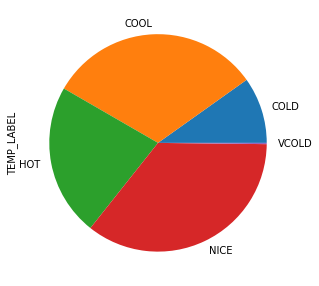

In [128]:
#Find out how many days of each kind of weather in our dataset
count_weather = S_W.TEMP_LABEL.value_counts().sort_index()
plot = count_weather.plot.pie(y='TEMP_LABEL', figsize=(5, 5))

In [63]:
VHOT = S_W[(S_W.TEMP_LABEL == "VHOT")]
VHOT

,STATION,DATE,TRAFFIC,TMAX,T_AVG,AWND,PRCP,SNOW,SNWD,WSF5,MONTH,YEAR,SY,TEMP_LABEL


This staion in Manhattan never got over 100 for max temp

In [70]:
HOT = S_W[(S_W.TEMP_LABEL == "HOT")]
print(HOT.TRAFFIC.sum())
print(S_W.TEMP_LABEL.value_counts().sort_index())

7301765800.0
COLD      40779
COOL     131796
HOT       93824
NICE     147032
VCOLD       754
Name: TEMP_LABEL, dtype: int64


In [66]:
NICE = S_W[(S_W.TEMP_LABEL == "NICE")]
NICE.TRAFFIC.sum()

11683737665.0

In [67]:
COOL = S_W[(S_W.TEMP_LABEL == "COOL")]
COOL.TRAFFIC.sum()

10091226761.0

In [68]:
COLD = S_W[(S_W.TEMP_LABEL == "COLD")]
COLD.TRAFFIC.sum()

3329444986.0

In [69]:
VCOLD = S_W[(S_W.TEMP_LABEL == "VCOLD")]
VCOLD.TRAFFIC.sum()

49932039.0

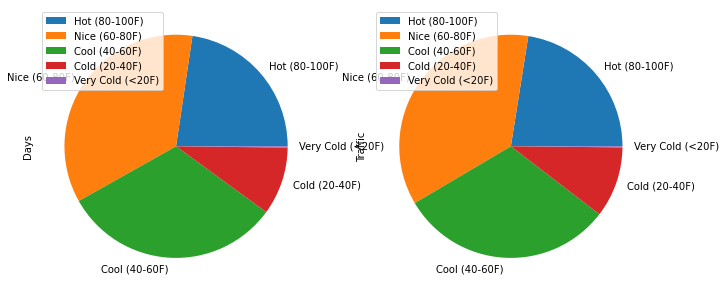

In [71]:
TRAFFIC_by_WEATHER = pd.DataFrame({'Days': [93824, 147032,131796, 40779,754],
                                   'Traffic': [7301765800.0, 11683737665.0, 10091226761.0, 3329444986.0 , 49932039.0]},
                                  index = ['Hot (80-100F)', 'Nice (60-80F)', 'Cool (40-60F)', 'Cold (20-40F)', 'Very Cold (<20F)'])
plot = TRAFFIC_by_WEATHER.plot.pie(subplots=True, figsize=(11, 6))
#plot = df.plot.pie(subplots=True, figsize=(11, 6))
#df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
#...                    'radius': [2439.7, 6051.8, 6378.1]},
#...                   index=['Mercury', 'Venus', 'Earth'])
#>>> plot = df.plot.pie(y='mass', figsize=(5, 5))

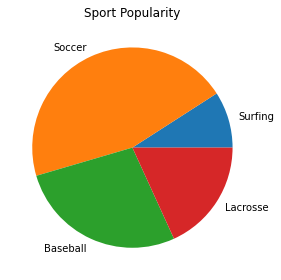

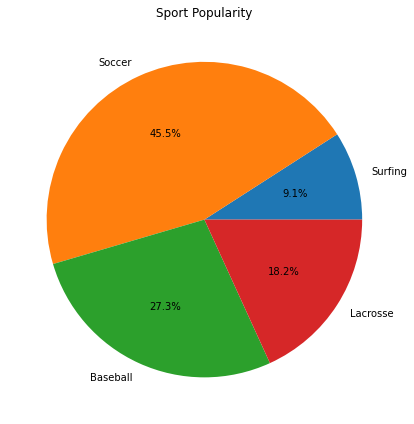

In [73]:
#TRAFFIC_by_WEATHER = pd.DataFrame({'Days': [93824, 147032,131796, 40779,754],
#                                   'Traffic': [7301765800.0, 11683737665.0, 10091226761.0, 3329444986.0 , 49932039.0]},
#                                  index = ['Hot (80-100F)', 'Nice (60-80F)', 'Cool (40-60F)', 'Cold (20-40F)', 'Very Cold (<20F)'])
import matplotlib.pyplot as plt
x = [10, 50, 30, 20]
labels = ['Surfing', 'Soccer', 'Baseball', 'Lacrosse']

fig, ax = plt.subplots()
ax.pie(x, labels=labels)
ax.set_title('Sport Popularity')
plt.tight_layout()

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(x, labels=labels, autopct='%.1f%%')
ax.set_title('Sport Popularity')
plt.tight_layout()

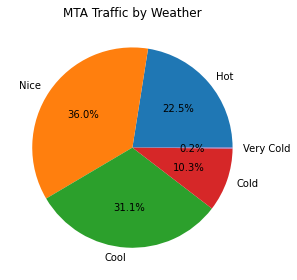

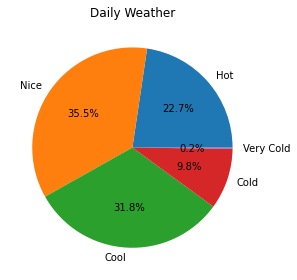

In [118]:

days = [93824, 147032,131796, 40779,754]
traffic = [7301765800.0, 11683737665.0, 10091226761.0, 3329444986.0 , 49932039.0]
labels1 = ['Hot (80-100F)', 'Nice (60-80F)', 'Cool (40-60F)', 'Cold (20-40F)', 'Very Cold (<20F)']
labels2 = ['Hot', 'Nice', 'Cool', 'Cold', 'Very Cold']

#fig, TRAFFIC_by_WEATHER = 
#x = [10, 50, 30, 20]
#labels = ['Surfing', 'Soccer', 'Baseball', 'Lacrosse']

#fig, ax = plt.subplots()
#ax.pie(days, labels=labels1)
#ax.set_title('Daily Weather')
#plt.tight_layout()

fig, ax = plt.subplots()
ax.pie(traffic, labels=labels2, autopct='%.1f%%')
ax.set_title('MTA Traffic by Weather')
plt.tight_layout()
plt.savefig('MTA Traffic by Weather')

fig, ay = plt.subplots()
ay.pie(days, labels=labels2, autopct='%.1f%%')
ay.set_title('Daily Weather')
plt.tight_layout()
plt.savefig('Daily Weather')

In [90]:
#Checking traffic on weekdays vs weekends:
S_W["DAY"] = S_W.DATE.dt.dayofweek
day_map = {range(0, 5): "weekday", range(5,7): "weekend"}
S_W["DAY_OF_WEEK"] = S_W.DAY.apply(lambda x: next((v for k, v in day_map.items() if x in k), 0))
S_W.sample()
S_W_WD = S_W[S_W.DAY_OF_WEEK == "weekday"]
S_W_WE = S_W[S_W.DAY_OF_WEEK == "weekend"]
S_W_WD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296238 entries, 0 to 414184
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   STATION      296238 non-null  object        
 1   DATE         296238 non-null  datetime64[ns]
 2   TRAFFIC      296238 non-null  float64       
 3   TMAX         296238 non-null  int64         
 4   T_AVG        296238 non-null  float64       
 5   AWND         262615 non-null  float64       
 6   PRCP         296238 non-null  float64       
 7   SNOW         296238 non-null  float64       
 8   SNWD         296238 non-null  float64       
 9   WSF5         261102 non-null  float64       
 10  MONTH        296238 non-null  int64         
 11  YEAR         296238 non-null  object        
 12  SY           296238 non-null  object        
 13  TEMP_LABEL   296238 non-null  object        
 14  DAY          296238 non-null  int64         
 15  DAY_OF_WEEK  296238 non-null  obje

In [88]:
S_W_WE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117947 entries, 1504 to 412299
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   STATION      117947 non-null  object        
 1   DATE         117947 non-null  datetime64[ns]
 2   TRAFFIC      117947 non-null  float64       
 3   TMAX         117947 non-null  int64         
 4   T_AVG        117947 non-null  float64       
 5   AWND         105089 non-null  float64       
 6   PRCP         117947 non-null  float64       
 7   SNOW         117947 non-null  float64       
 8   SNWD         117947 non-null  float64       
 9   WSF5         103199 non-null  float64       
 10  MONTH        117947 non-null  int64         
 11  YEAR         117947 non-null  object        
 12  SY           117947 non-null  object        
 13  TEMP_LABEL   117947 non-null  object        
 14  DAY          117947 non-null  int64         
 15  DAY_OF_WEEK  117947 non-null  o

In [99]:
#How much traffic occurs on weekends relative to weekdays?
#S_W_WE.TRAFFIC.sum()/S_W_WD.TRAFFIC.sum()
total_traff = S_W_WE.TRAFFIC.sum()+S_W_WD.TRAFFIC.sum()
we_traff = S_W_WE.TRAFFIC.sum() / total_traff
wd_traff = S_W_WD.TRAFFIC.sum() / total_traff
print(we_traff)
print(wd_traff)

0.26639245773177583
0.7336075422682242


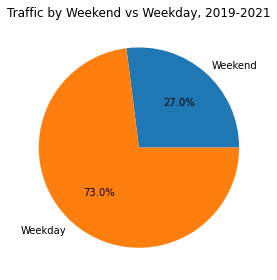

In [121]:
days = [0.27, 0.73]
labels = ['Weekend', 'Weekday']
fig, az = plt.subplots()
az.pie(days, labels=labels, autopct='%.1f%%')
az.set_title('Traffic by Weekend vs Weekday, 2019-2021')
plt.tight_layout()
plt.savefig('Traffic_by_WE_WD')

In [100]:
S_W_WE.sample()

,STATION,DATE,TRAFFIC,TMAX,T_AVG,AWND,PRCP,SNOW,SNWD,WSF5,MONTH,YEAR,SY,TEMP_LABEL,DAY,DAY_OF_WEEK
17432,63 DR-REGO PARK,2019-02-16,42627.0,47,39.5,NaN,0.0,0.0,0.0,NaN,2,2019,W2019,COOL,5,weekend


In [101]:
#create a df for each season+year's top traffic stations for turning into visualizations
S_W_SY_sort = S_W[S_W["SY"] == "F2019"].sort_values("TRAFFIC", ascending = False)
F2019_S_W = S_W_SY_sort.head(5) 
F2019_S_W

,STATION,DATE,TRAFFIC,TMAX,T_AVG,AWND,PRCP,SNOW,SNWD,WSF5,MONTH,YEAR,SY,TEMP_LABEL,DAY,DAY_OF_WEEK
113885,PATH NEW WTC,2019-10-29,1118217.0,59,56.5,4.03,0.07,0.0,0.0,14.1,10,2019,F2019,COOL,1,weekday
116147,PATH NEW WTC,2019-11-04,1096723.0,56,48.5,3.13,0.00,0.0,0.0,21.0,11,2019,F2019,COOL,0,weekday
114262,PATH NEW WTC,2019-10-30,1095365.0,63,60.5,3.13,0.06,0.0,0.0,15.0,10,2019,F2019,NICE,2,weekday
116524,PATH NEW WTC,2019-11-05,1092265.0,61,56.0,2.91,0.00,0.0,0.0,18.1,11,2019,F2019,NICE,1,weekday
103329,PATH NEW WTC,2019-10-01,1073990.0,81,72.0,3.80,0.00,0.0,0.0,23.9,10,2019,F2019,HOT,1,weekday


In [102]:
#This season has all kinds of weather days. I want to know about the traffic by weather. Also, the table above does not help because traffic is not summed by station
S_W_TEMP_sort = S_W[S_W["TEMP_LABEL"] == "COOL"].sort_values("TRAFFIC", ascending = False)
COOL_S_W = S_W_TEMP_sort.head(5) 
COOL_S_W

,STATION,DATE,TRAFFIC,TMAX,T_AVG,AWND,PRCP,SNOW,SNWD,WSF5,MONTH,YEAR,SY,TEMP_LABEL,DAY,DAY_OF_WEEK
391377,GRD CNTRL-42 ST,2021-11-01,1169530.0,58,54.0,5.14,0.0,0.0,0.0,21.0,11,2021,F2021,COOL,0,weekday
392511,GRD CNTRL-42 ST,2021-11-04,1169108.0,50,44.5,3.58,0.0,0.0,0.0,10.1,11,2021,F2021,COOL,3,weekday
392133,GRD CNTRL-42 ST,2021-11-03,1163030.0,51,46.0,4.03,0.0,0.0,0.0,19.9,11,2021,F2021,COOL,2,weekday
391755,GRD CNTRL-42 ST,2021-11-02,1150181.0,53,48.5,2.91,0.0,0.0,0.0,19.0,11,2021,F2021,COOL,1,weekday
389865,GRD CNTRL-42 ST,2021-10-28,1147105.0,57,53.0,4.92,0.0,0.0,0.0,17.0,10,2021,F2021,COOL,3,weekday


In [110]:
#Adding all new traffic by station by weather day (aka "TEMP_LABEL"). Sorting with highest traffic stations at top
S_W_SUM_TEMP = S_W.groupby(["STATION", "TEMP_LABEL"])[["TRAFFIC"]].sum().reset_index().sort_values(["TRAFFIC"], ascending = False)
S_W_SUM_TEMP

,STATION,TEMP_LABEL,TRAFFIC
1576,PATH NEW WTC,NICE,315253797.0
1574,PATH NEW WTC,COOL,279125715.0
1168,GRD CNTRL-42 ST,NICE,269707144.0
1133,FULTON ST,NICE,257181350.0
1575,PATH NEW WTC,HOT,230224988.0
...,...,...,...
1464,NEPTUNE AV,VCOLD,2491.0
719,BEACH 36 ST,VCOLD,2435.0
1667,ROCKAWAY PARK B,VCOLD,1835.0
739,BEACH 90 ST,VCOLD,1803.0


In [112]:
#Creating DFs with each unique weather type, sorted
S_W_SUM_TEMP_COOL = S_W_SUM_TEMP[S_W_SUM_TEMP["TEMP_LABEL"] == "COOL"].sort_values("TRAFFIC", ascending = False)
S_W_SUM_TEMP_COOL.head(5)

,STATION,TEMP_LABEL,TRAFFIC
1574,PATH NEW WTC,COOL,279125715.0
1166,GRD CNTRL-42 ST,COOL,226834729.0
1131,FULTON ST,COOL,195095694.0
306,34 ST-PENN STA,COOL,162804140.0
1341,LACKAWANNA,COOL,147140740.0


In [113]:
S_W_SUM_TEMP_NICE = S_W_SUM_TEMP[S_W_SUM_TEMP["TEMP_LABEL"] == "NICE"].sort_values("TRAFFIC", ascending = False)
S_W_SUM_TEMP_NICE.head(5)

,STATION,TEMP_LABEL,TRAFFIC
1576,PATH NEW WTC,NICE,315253797.0
1168,GRD CNTRL-42 ST,NICE,269707144.0
1133,FULTON ST,NICE,257181350.0
903,CHAMBERS ST,NICE,183024270.0
1831,WALL ST,NICE,167650534.0


In [114]:
S_W_SUM_TEMP_COLD = S_W_SUM_TEMP[S_W_SUM_TEMP["TEMP_LABEL"] == "COLD"].sort_values("TRAFFIC", ascending = False)
S_W_SUM_TEMP_COLD.head(5)

,STATION,TEMP_LABEL,TRAFFIC
1573,PATH NEW WTC,COLD,85706792.0
1165,GRD CNTRL-42 ST,COLD,69635700.0
1130,FULTON ST,COLD,65310624.0
305,34 ST-PENN STA,COLD,59428461.0
1828,WALL ST,COLD,52011667.0


In [115]:
S_W_SUM_TEMP_VCOLD = S_W_SUM_TEMP[S_W_SUM_TEMP["TEMP_LABEL"] == "VCOLD"].sort_values("TRAFFIC", ascending = False)
S_W_SUM_TEMP_VCOLD.head(5)

,STATION,TEMP_LABEL,TRAFFIC
1577,PATH NEW WTC,VCOLD,1341379.0
309,34 ST-PENN STA,VCOLD,1123911.0
1399,METS-WILLETS PT,VCOLD,1055479.0
1344,LACKAWANNA,VCOLD,941749.0
1134,FULTON ST,VCOLD,921798.0


In [116]:
S_W_SUM_TEMP_HOT = S_W_SUM_TEMP[S_W_SUM_TEMP["TEMP_LABEL"] == "HOT"].sort_values("TRAFFIC", ascending = False)
S_W_SUM_TEMP_HOT.head(5)

,STATION,TEMP_LABEL,TRAFFIC
1575,PATH NEW WTC,HOT,230224988.0
1132,FULTON ST,HOT,166247704.0
1167,GRD CNTRL-42 ST,HOT,151274602.0
1342,LACKAWANNA,HOT,120219934.0
902,CHAMBERS ST,HOT,109885731.0


In [187]:
#I need to normalize the data so I can put all of the seasonal traffic on one bar chart. 
#xnormalized = (x - xmin) / range of x 
#Create new column, then concat the tables for bar chart creation
#Am I using the correct range?.. 
S_W_SUM_TEMP_HOT["TRAFF_NORM"] = (S_W_SUM_TEMP_HOT["TRAFFIC"]-S_W_SUM_TEMP_HOT["TRAFFIC"].min())/(S_W_SUM_TEMP_HOT["TRAFFIC"].max()-S_W_SUM_TEMP_HOT["TRAFFIC"].min())

S_W_SUM_TEMP_VCOLD["TRAFF_NORM"] = (S_W_SUM_TEMP_VCOLD["TRAFFIC"]-S_W_SUM_TEMP_VCOLD["TRAFFIC"].min())/(S_W_SUM_TEMP_VCOLD["TRAFFIC"].max()-S_W_SUM_TEMP_VCOLD["TRAFFIC"].min())

S_W_SUM_TEMP_COOL["TRAFF_NORM"] = (S_W_SUM_TEMP_COOL["TRAFFIC"]-S_W_SUM_TEMP_COOL["TRAFFIC"].min())/(S_W_SUM_TEMP_COOL["TRAFFIC"].max()-S_W_SUM_TEMP_COOL["TRAFFIC"].min())

S_W_SUM_TEMP_COLD["TRAFF_NORM"] = (S_W_SUM_TEMP_COLD["TRAFFIC"]-S_W_SUM_TEMP_COLD["TRAFFIC"].min())/(S_W_SUM_TEMP_COLD["TRAFFIC"].max()-S_W_SUM_TEMP_COLD["TRAFFIC"].min())

S_W_SUM_TEMP_NICE["TRAFF_NORM"] = (S_W_SUM_TEMP_NICE["TRAFFIC"]-S_W_SUM_TEMP_NICE["TRAFFIC"].min())/(S_W_SUM_TEMP_NICE["TRAFFIC"].max()-S_W_SUM_TEMP_NICE["TRAFFIC"].min())

#test out a visualization with a couple tables in a more familiar app to double check process
S_W_SUM_TEMP_HOT.to_csv("S_W_SUM_TEMP_HOT.csv")
S_W_SUM_TEMP_VCOLD.to_csv("S_W_SUM_TEMP_VCOLD.csv")
S_W_SUM_TEMP_COOL.to_csv("S_W_SUM_TEMP_COOL.csv")

In [230]:
S_W_TOP_5 = pd.concat([S_W_SUM_TEMP_HOT.head(5) , S_W_SUM_TEMP_VCOLD.head(5), S_W_SUM_TEMP_COOL.head(5), S_W_SUM_TEMP_COLD.head(5), S_W_SUM_TEMP_NICE.head(5)], ignore_index = True)
S_W_TOP_5["TRAFF_NORM2"] = (S_W_TOP_5["TRAFFIC"]-S_W_TOP_5["TRAFFIC"].min())/(S_W_TOP_5["TRAFFIC"].max()-S_W_TOP_5["TRAFFIC"].min())
S_W_TOP_5

,STATION,TEMP_LABEL,TRAFFIC,TRAFF_NORM,TRAFF_NORM2,TRAFF_NORM_2
0,PATH NEW WTC,HOT,230224988.0,1.000000,0.729494,607453.794195
1,FULTON ST,HOT,166247704.0,0.721671,0.525960,438648.295515
2,GRD CNTRL-42 ST,HOT,151274602.0,0.656532,0.478325,399141.430079
3,LACKAWANNA,HOT,120219934.0,0.521430,0.379529,317202.992084
4,CHAMBERS ST,HOT,109885731.0,0.476472,0.346652,289935.965699
5,PATH NEW WTC,VCOLD,1341379.0,1.000000,0.001335,3548.621693
6,34 ST-PENN STA,VCOLD,1123911.0,0.837742,0.000643,2973.309524
7,METS-WILLETS PT,VCOLD,1055479.0,0.786683,0.000425,2792.272487
8,LACKAWANNA,VCOLD,941749.0,0.701827,0.000063,2491.399471
9,FULTON ST,VCOLD,921798.0,0.686941,0.000000,2438.619048


In [223]:
S_W_TOP_5.STATION.value_counts()

PATH NEW WTC       5
FULTON ST          5
GRD CNTRL-42 ST    4
LACKAWANNA         3
34 ST-PENN STA     3
CHAMBERS ST        2
WALL ST            2
METS-WILLETS PT    1
Name: STATION, dtype: int64

ValueError: shape mismatch: objects cannot be broadcast to a single shape

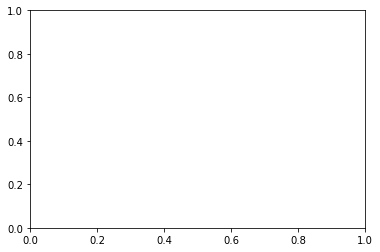

In [217]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Path New WTC', 'Fulton St', 'Grand Central-42 St', 'Lackawanna', '34 St-Penn Sta', 'Chambers', 'Wall St', 'Mets-Willets Pt']
HOT_TRAFF = [1.0, 0.721671, 0.656532, 0.52143, 0, 0.476472, 0 , 0 ]
NICE_TRAFF = [1.0, 0.815465, 0.855268, 0, 0, 0.579819, 0.530967, 0]
COOL_TRAF = [1.0, 0.698940, 0.812654, 0.527129, 0.583247, 0, 0, 0]
COLD_TRAFF = [1.0, 0.761412, 0.812005, 0, 0.692604, 0, 0.605845, 0]
VCOLD_TRAFF = [1.0, 0.686941, 0, 0.701827, 0.837742, 0, 0, 0.786683]


#x = np.arange(len(labels))  # the label locations
#width = 0.20  # the width of the bars

#fig, ax = plt.subplots()
#rects1 = ax.bar(x - width/2, HOT_TRAFF, width, label='Hot')
#rects2 = ax.bar(x + width/2, NICE_TRAFF, width, label='Nice')
#rects2 = ax.bar(x + width/2, women_means, width, label='Women')
#rects3 = ax.bar(x - width/4, COOL_TRAFF, width, label='Cool')
#rects4 = ax.bar(x + width/4, COLD_TRAFF, width, label='Cold')
#rects5 = ax.bar(x + width/2, VCOLD_TRAFF, width, label='Very Cld')


# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('MTA Turnstile Traffic Normalized')
#ax.set_title('Normalized MTA Turnstile Traffic at Busiest Stations for Different Weather')
#ax.set_xticks(x)
#ax.set_xticklabels(labels, rotation = 90)
#ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

#fig.tight_layout()

#plt.show()

#x = np.arange(5)
#y1 = [34, 56, 12, 89, 67]
#y2 = [12, 56, 78, 45, 90]
#y3 = [14, 23, 45, 25, 89]
width = 0.2
labels = ['Path New WTC', 'Fulton St', 'Grand Central-42 St', 'Lackawanna', '34 St-Penn Sta', 'Chambers', 'Wall St', 'Mets-Willets Pt']
HOT_TRAFF = [1.0, 0.721671, 0.656532, 0.52143, 0, 0.476472, 0 , 0 ]
NICE_TRAFF = [1.0, 0.815465, 0.855268, 0, 0, 0.579819, 0.530967, 0]
COOL_TRAF = [1.0, 0.698940, 0.812654, 0.527129, 0.583247, 0, 0, 0]
COLD_TRAFF = [1.0, 0.761412, 0.812005, 0, 0.692604, 0, 0.605845, 0]
VCOLD_TRAFF = [1.0, 0.686941, 0, 0.701827, 0.837742, 0, 0, 0.786683]
# plot data in grouped manner of bar type
plt.bar(((x-0.2)-0.2), HOT_TRAFF, width, color='red')
plt.bar(x-0.2, NICE_TRAFF, width, color='orange')
plt.bar(x, COOL_TRAFF, width, color='green')
plt.bar(x+0.2, COLD_TRAFF, width, color='blue')
plt.bar(((x+0.2)+0.2), VCOLD_TRAFF, width, color='cyan')
plt.bar
plt.xticks(x)#, ['Team A', 'Team B', 'Team C', 'Team D', 'Team E'])
plt.set_xticklabels(labels, rotation = 90)
plt.xlabel("Teams")
plt.ylabel("Scores")
plt.legend()#["Round 1", "Round 2", "Round 3"])
plt.show()

### Client was interested in holiday traffic as well

In [144]:
#I'll check end of year holidays and 4th of July
HOL_19 = S_W[(S_W["DATE"] >= "12-21-2019") & (S_W["DATE"] <= "01-02-2020")].groupby(["STATION", "YEAR"])[["TRAFFIC"]].sum().reset_index().sort_values(["TRAFFIC"], ascending = False)
HOL_20 = S_W[(S_W["DATE"] >= "12-21-2020") & (S_W["DATE"] <= "01-02-2021")].groupby(["STATION", "YEAR"])[["TRAFFIC"]].sum().reset_index().sort_values(["TRAFFIC"], ascending = False)
HOL_21 = S_W[(S_W["DATE"] >= "12-21-2021") & (S_W["DATE"] <= "01-02-2022")].groupby(["STATION", "YEAR"])[["TRAFFIC"]].sum().reset_index().sort_values(["TRAFFIC"], ascending = False)
#JULY4 = S_W[(S_W["DATE"] == "07-04-2019"),(S_W["DATE"] == "07-04-2020"),(S_W["DATE"] == "07-04-2021")].groupby(["STATION", "YEAR"])[["TRAFFIC"]].sum().reset_index().sort_values(["TRAFFIC"], ascending = False)
ALL_HOL = pd.concat([HOL_19.head(5),  HOL_20.head(5) , HOL_21.head(5)])
print(HOL_19.head(5))
print(HOL_20.head(5))
print(HOL_21.head(5))
ALL_HOL
#JULY4 # Getting error. not key objective. Return if I have time.

             STATION  YEAR    TRAFFIC
628     PATH NEW WTC  2019  8953638.0
452        FULTON ST  2019  5267356.0
558  METS-WILLETS PT  2019  5213177.0
466  GRD CNTRL-42 ST  2019  4692917.0
516   JOURNAL SQUARE  2019  4535164.0
             STATION  YEAR    TRAFFIC
466  GRD CNTRL-42 ST  2020  8608005.0
628     PATH NEW WTC  2020  6490192.0
452        FULTON ST  2020  6232310.0
250   ATL AV-BARCLAY  2020  5981933.0
730          WALL ST  2020  5901150.0
             STATION  YEAR     TRAFFIC
232  GRD CNTRL-42 ST  2021  10557104.0
313     PATH NEW WTC  2021   9661195.0
225        FULTON ST  2021   7414097.0
125   ATL AV-BARCLAY  2021   6697495.0
191     CORTLANDT ST  2021   6645715.0


,STATION,YEAR,TRAFFIC
628,PATH NEW WTC,2019,8953638.0
452,FULTON ST,2019,5267356.0
558,METS-WILLETS PT,2019,5213177.0
466,GRD CNTRL-42 ST,2019,4692917.0
516,JOURNAL SQUARE,2019,4535164.0
466,GRD CNTRL-42 ST,2020,8608005.0
628,PATH NEW WTC,2020,6490192.0
452,FULTON ST,2020,6232310.0
250,ATL AV-BARCLAY,2020,5981933.0
730,WALL ST,2020,5901150.0


Plots to work on: bar graph with top 5-10 stations and normalized ridership color coded by weather days. 
Investigate rain days? Snow days
Mark on map the stations with highest traffic. 
Mark on map the areas that do not permit mobile food venders.

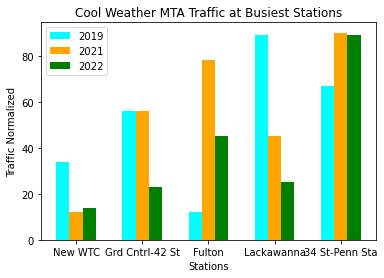

In [229]:
#y = np.arange(5)
y1 = [34, 56, 12, 89, 67]
y2 = [12, 56, 78, 45, 90]
y3 = [14, 23, 45, 25, 89]
width = 0.2
  
# plot data in grouped manner of bar type
plt.bar((x-0.2), y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['New WTC', 'Grd Cntrl-42 St', 'Fulton St', 'Lackawanna', '34 St-Penn Sta']#, 'Chambers', 'Wall St', 'Mets-Willets Pt'])
plt.xlabel("Stations")
plt.ylabel("Traffic Normalized")
plt.legend(["2019", "2021", "2022"])
plt.title("Cool Weather MTA Traffic at Busiest Stations")
plt.show()

In [ ]:
PATH NEW WTC       5 #Manhattan
FULTON ST          5 #Manhattan
GRD CNTRL-42 ST    4 #Manhattan
LACKAWANNA         3 #Weird near scranton? showed up when cool vcold and hot. not top station.
34 ST-PENN STA     3 #Manhattan
CHAMBERS ST        2 #Manhattan
WALL ST            2 #Manhattan
METS-WILLETS PT    1 #this one is super weird because it is a limited use station